---
# <center> **An Introduction to Data Science**
## <center> Spring 2024

### <center> **Prof. Bahram Mobasher**
### Teaching Assistant: **Sina Taamoli** | email: *sina.taamoli@email.ucr.edu*
### [Course webpage](https://github.com/sinataamoli/Applied-Data-Science)
#### Week 4 (April 25th): Bayesian Statistics
---

## Bayesian Statistics

In the Bayesian framework, the probability is defined as the measure of belief in an event occurring. We naturally use our beliefs as a probability of an event. Our belief in a hypothesis after taking data is proportional to how well that hypothesis explains the data times our prior belief.

<center> $P(hypothesis|data) \propto P(data|hypothesis) P(hypothesis)$ <center>

P(hypothesis|data): Posterior probability <br>
P(data|hypothesis): Likelihood function <br>
P(hypothesis): Prior probability

Example: Daniel Kahneman has an interesting example in his book. Steve has been described by his neighbor as follows: “Steve is very shy and withdrawn, helpful but with very little interest in people or in the world of reality. He has a need for order and structure, and a passion for detail.” Is Steve more likely to be a librarian or a farmer?

At first glance, it seems that Steve is more likely to be a librarian. Are we missing something?
Yes, we are missing prior belief (background information). In the United States, the ratio of male
farmers to male librarians is about 20 to 1. How can we incorporate this background information
in our belief? If we have no information from his neighbor, then the probability of being a librarian is $\frac{1}{21}$. So, prior probability=P(steve is a librarian) = $\frac{1}{21}$. Now, we are given information from the neighbor. The probability of his neighbor’s description given that Steve is a librarian shows the likelihood function. Let’s consider that we are 90% confident that the neighbor describes Steve in that way if he is a librarian. So, P(neighbor info|Steve is a librarian)= 0.9.

P(Steve is a librarian|neighbor info) $\propto$ P(neighbor info|Steve is a librarian) P(Steve is a librarian)

Posterior probability on the left-hand side of the equation should be normalized (0 ≤ P ≤ 1), so:

P(Steve is a librarian|neighbor info) <br>
<br>
= $\frac{\text{P(neighbor info|Steve is a librarian})P(\text{Steve is a librarian)}}{
P(\text{neighbor info|Steve is a librarian})P(\text{Steve is a librarian})+P(\text{neighbor info|Steve is a farmer})P(\text{Steve is a farmer})}$ <br>
<br>
Let’s consider that P(neighbor info|Steve is a farmer)= 0.5 <br>
 P(Steve is a librarian|neighbor info) =$\frac{
0.9× 1 21}{
0.9× 1 +0.5× 20}$
= 8.2% <br>
 Now, let’s look into another example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Poisson distribution <br>
$P(k;\lambda) = \frac{\lambda^{k}e^{-\lambda}}{k!}$ <br>
Create random numbers with Poisson distribution

In [17]:
t = np.random.poisson(10, 100000)
t, len(t)

(array([14, 12, 13, ..., 17, 13,  7]), 100000)

what is the average of k?

In [36]:
Poisson = lambda k, λ: (λ**k) * np.exp(-λ) / np.math.factorial(k)

In [37]:
Poisson = np.vectorize(Poisson)

In [6]:
Poisson(2, 10)

array(0.00227)

In [19]:
k = np.arange(25)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [20]:
poisson_function = [Poisson(k[i], 10) for i in range(len(k))]

Text(0, 0.5, 'P')

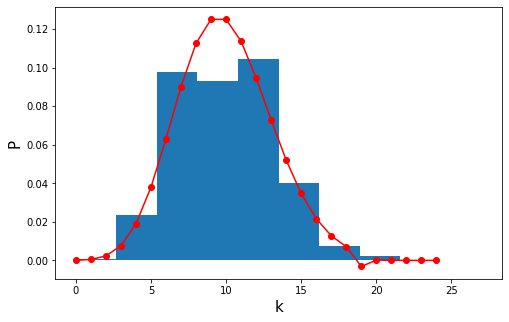

In [21]:
plt.figure(figsize = (8, 5))

plt.hist(t, bins = 10, density = True)
plt.plot(np.arange(25), poisson_function, c = 'r', marker = 'o')

plt.xlabel('k', fontsize = 15)
plt.ylabel('P', fontsize = 15)

What is the average of k?

In [23]:
np.mean(t)

10.00958

In [25]:
tweet = np.random.poisson(50, 52)
tweet

array([43, 56, 45, 54, 39, 44, 47, 58, 64, 54, 49, 40, 54, 48, 46, 40, 44,
       57, 39, 49, 43, 49, 66, 55, 41, 47, 41, 50, 59, 59, 54, 45, 52, 53,
       59, 59, 41, 41, 58, 53, 45, 58, 47, 57, 39, 44, 46, 61, 37, 38, 41,
       66])

Text(0.5, 1.0, 'Weekly tweet counts')

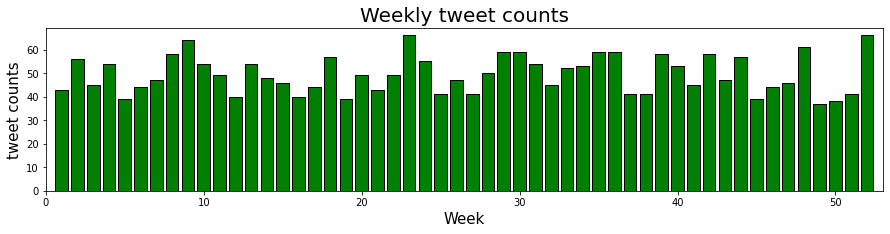

In [26]:
plt.figure(figsize = (15, 3))
plt.bar(np.arange(1, 53), tweet, color = 'green', edgecolor='black')
plt.xlim(0, 53)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('tweet counts', fontsize = 15)

plt.title('Weekly tweet counts', fontsize = 20)

The data have been generated using Poisson distribution with $\lambda=50$. Imagine that we don't know underlying distribution and we want to estimate it.<br>
Consider that the weekly tweet counts are drawn from a Poisson distribution with unknown $\lambda$. Do we have any prior belief on $\lambda$? <br>
Exponential random distribution<br>
$P(\lambda, \alpha) = \alpha e^{-\lambda \alpha}$

Assume that a normal person tweets 25 tweets per week ($\alpha = 1/25=0.04$)

In [28]:
Exponential = lambda λ, α: α * np.exp(-λ * α)
Exponential = np.vectorize(Exponential)

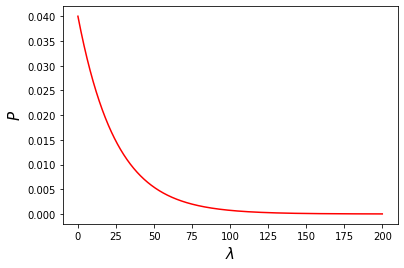

In [29]:
plt.plot(np.linspace(0, 200, 1000), Exponential(np.linspace(0, 200, 1000), 0.04), c = 'r')
plt.xlabel(r'$\lambda$', fontsize = 15)
plt.ylabel(r'$P$', fontsize = 15)
plt.show()

Let's make a grid for $\lambda$ and find posterior of every single point

In [55]:
λ_est = np.linspace(40, 60, 2000)
λ_est

array([40.        , 40.010005  , 40.02001001, ..., 59.97998999,
       59.989995  , 60.        ])

In [56]:
def posterior_tweet(λ_est, tweet_Data):
    return np.prod(Poisson(tweet_Data, λ_est) * Exponential(λ_est, 0.04))

In [57]:
P = np.array([])
for j in λ_est:
    P = np.append(P, posterior_tweet(j, tweet))

In [58]:
Posterior = P / np.trapz(P, λ_est)

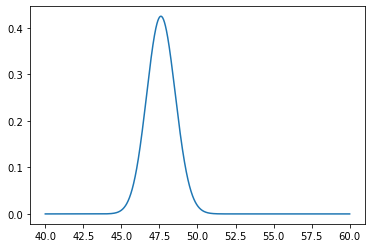

In [59]:
plt.plot(λ_est, Posterior)

In [60]:
λ_mode = λ_est[np.argmax(Posterior)]
λ_mode

47.59379689844923

Text(47.59379689844923, 0.4252330843329765, '$\\lambda_{mode}$ = 47.59')

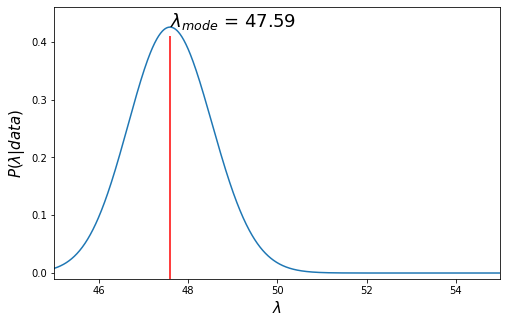

In [43]:
plt.figure(figsize = (8, 5))
plt.plot(λ_est, Posterior)
plt.vlines(λ_mode, -0.01, 0.41, color = 'red')
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('$P(\lambda | data)$', fontsize = 15)
plt.ylim(-0.01, 0.46)
plt.xlim(45, 55)
plt.text(λ_mode, np.max(Posterior), '$\lambda_{mode}$ = %.2f' %λ_mode, fontsize = 18)

How to define confidence interval? Consider that the posterior is symmetric with no skew. <br>
The expected value of $x = \bar{x} = \int xP(x)dx$

In [61]:
μ = np.trapz(λ_est * Posterior, λ_est)
μ

47.6146449704142

<center> Variace of $x = \int (x-\bar{x})^{2}P(x)dx$

In [62]:
σ = np.sqrt(np.trapz(((λ_est - μ)**2)* Posterior, λ_est))
σ

0.9383220751749459

so we are 68\% confident that $\lambda$ is between   and.   

In [64]:
mask = (λ_est >= (λ_mode - σ)) & (λ_est <= (λ_mode + σ))

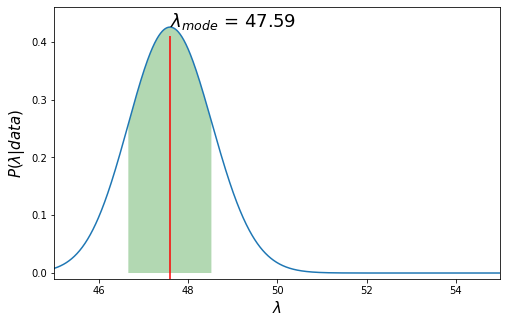

In [69]:
plt.figure(figsize = (8, 5))
plt.plot(λ_est, Posterior)
plt.vlines(λ_mode, -0.01, 0.41, color = 'red')
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel('$P(\lambda | data)$', fontsize = 15)
plt.ylim(-0.01, 0.46)
plt.xlim(45, 55)
plt.text(λ_mode, np.max(Posterior), '$\lambda_{mode}$ = %.2f' %λ_mode, fontsize = 18)
plt.fill_between(λ_est, Posterior, where = [(x >= (λ_mode - σ)) & (x<= (λ_mode + σ)) for x in λ_est], facecolor = 'green', alpha = 0.3)

---
# <center> **An Introduction to Data Science**
## <center> Spring 2024

### <center> **Prof. Bahram Mobasher**
### Teaching Assistant: **Sina Taamoli** | email: *sina.taamoli@email.ucr.edu*
### [Course webpage](https://github.com/sinataamoli/Applied-Data-Science)
#### Week 5 (May 2nd): Bayesian Statistics
---

### a) reading data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('tweet_counts.csv')
data_arr = data.to_numpy()

In [4]:
data

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0
5,6,44.0
6,7,33.0
7,8,42.0
8,9,31.0
9,10,28.0


In [5]:
week = data_arr[:,0]
week = week.astype(int)
tweets = data_arr[:,1]
tweets = tweets.astype(int)

In [6]:
np.mean(tweets)

38.76923076923077

##### average number of tweets over 52 weeks is about

### b) bar plot

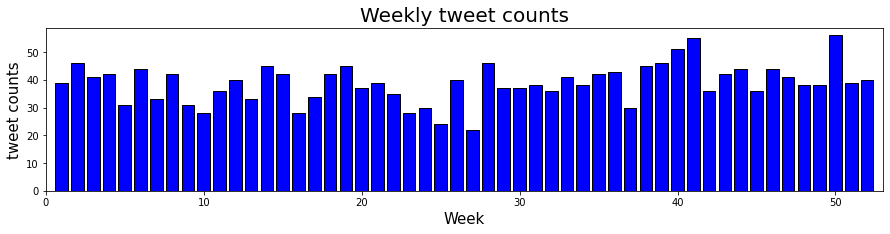

In [7]:
fig = plt.figure(figsize=(15,3))
plt.bar(week,tweets, color='blue',edgecolor='black')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.title('Weekly tweet counts', fontsize=20)
fig.facecolor = 'white'

### c) mean value of exponential distribution

### d)

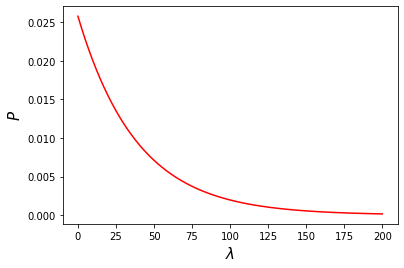

In [9]:
α=1/np.mean(tweets)

Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),α),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P$', fontsize=15)
plt.show()

### e)

priors for $\lambda_{1}$ and $\lambda_{2}$ is exponential and for $W_{s}$ is a flat function.

In [8]:
λ1_est=np.linspace(25,50,50)
λ2_est=np.linspace(25,50,50)
Ws_est=np.arange(1,53,1)

In [9]:
Poisson = lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson = np.vectorize(Poisson)

### f)

#### First, we calculate posterior for each set of $[\lambda_{1},\lambda_{2},Ws]$ in 3D space

#### Marginalized posterior for $\lambda_{1}$ and $\lambda_{2}$

In [13]:
PP = PP / np.sum(PP)

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(λ1_est, PP[:, 0, 39]/np.trapz(PP[:, 0, 39],λ1_est),label='λ1 posterior',color='blue')
plt.plot(λ2_est, PP[0, :, 39]/np.trapz(PP[0, :, 39],λ2_est),label='λ2 posterior',color='green')
plt.legend()
plt.vlines(λ1_est[np.argmax(PP[:, 0, 39])],-0.01,0.4,color='red')
plt.vlines(λ2_est[np.argmax(PP[0, :, 39])],-0.01,0.22,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.text(λ1_est[np.argmax(PP[:, 0, 39])]+1,0.35,'λ1(mode)={:0.2f}'.format(λ1_est[np.argmax(PP[:, 0, 39])]),fontsize=12)
plt.text(λ2_est[np.argmax(PP[0, :, 39])],0.24,'λ2(mode)={:0.2f}'.format(λ2_est[np.argmax(PP[0, :, 39])]),fontsize=12)
plt.title('marginalized-posterior for $\lambda_{1}$ and $\lambda_{2}$',fontsize=15)
fig.facecolor = 'white'
plt.show()

 #### Marginalized posterior for $Ws$

In [15]:
def Posterior_margW(Ws):
    return (np.sum(PP[:,:,Ws-1])/np.sum(PP))

Posterior_margW = np.vectorize(Posterior_margW)

In [ ]:
fig = plt.figure(figsize=(15,3))
plt.bar(Ws_est,Posterior_margW(Ws_est), color='blue',edgecolor='black')
plt.xlabel('Week',fontsize=13)
plt.ylabel('$P(Ws|data)$',fontsize=13)
plt.title('marginalized-posterior for Ws', fontsize=16)
fig.facecolor = 'white'

In [ ]:
print('the peak of Ws is at week',Ws_est[np.argmax(Posterior_margW(Ws_est))])

### g)

##### The answer is: $P(\lambda_{2}-\lambda_{1}>5)=\int_{\lambda_{2}=\lambda_{1}+5}^{50}\int_{\lambda_{1}=25}^{50}P(\lambda_{1},\lambda_{2})d\lambda_{1}d\lambda_{2}$

#### we have the posterior probability for $\lambda_{1}$ and $\lambda_{2}$...

## Naive Bayes spam filtering

Consider that you are given a data set of text messages which are labeled with ham or spam. We will use a training sample with ~4000 text messages, but first let’s consider a few examples to get familiar with the naive Bayes idea. <br>
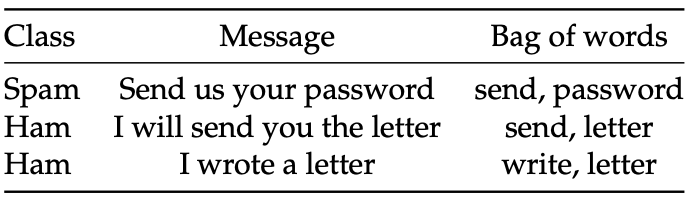

